In [1]:
# En primer lugar, se importan las librerías necesarias

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from IPython.display import display, Markdown
import numpy as np
import pandas as pd
import string
import os
import pickle
from community import community_louvain

El análisis de conexiones cerebrales ha revelado características significativas sobre la organización de la red cerebral en una gran variedad de especies. En el caso de redes anatómicas a gran escala, se observan atributos claramente no aleatorios, entre los que se incluye una arquitectura modular eficiente de mundo pequeño, con comunidades distintas interconectadas por regiones centrales. La importancia funcional de esos centros motiva un examen más detallado de sus interconexiones mutuas, específicamente para examinar la hipótesis de que las regiones centrales están más densamente vinculadas de lo esperado, formando un club rico central. En particular, este trabajo se centra en la existencia de una organización de clubs ricos en la red de la corteza cerebral de un primate no humano, el macaco. Dicha red se encuentra contenida en el archivo ``rhesus_brain_1.graphml`` de la carpeta ``datos`` aportada.

Con el objetivo de estudiar esta red, se procede a responder a una serie de preguntas sobre el grafo. Para poder responder a muchas de estas preguntas, se requiere el uso de las funciones proporcionadas por el módulo ``networkx`` de forma que, antes de nada, se va a proceder a cargar dicha red:

In [2]:
# Carga del grafo
G_RB = nx.read_graphml("./datos/rhesus_brain_1.graphml")

* a. ¿Es ponderado?

El grafo de estudio se lee a partir de un fichero en formato graphml, que es una especie de formato xml, el cual consiste en un árbol dividido en subárboles. Si se observan dichos subárboles, se pueden ver dos grandes conjuntos de etiquetas: "node", que permite definir el identificador de cada nodo; y "edge", que permite definir las ramas. En el segundo caso, se puede observar que la única información disponible son los nodos de origen y destino de cada rama en cuestión. Por tanto, este grafo no es ponderado porque, en caso de que lo fuera, debería especificarse el peso asignado a cada rama en cuestión, cuando no es así.

* b. ¿Cuál es su tamaño y su orden? ¿Es un grafo dirigido o no? ¿Es un grafo denso o disperso?

In [3]:
# Cálculos
n = nx.number_of_nodes(G_RB)
m = nx.number_of_edges(G_RB)
info = nx.info(G_RB)
directionality = nx.is_directed(G_RB)
dens = nx.density(G_RB)

# Respuestas
display(Markdown("""
<br>
Respecto al orden y el tamaño del grafo, estas métricas pueden calcularse a través de las funciones
``nx.number_of_nodes()`` y ``nx.number_of_edges()``, cuyos resultados son:

* Orden del grafo: {0}
* Tamaño del grafo: {1}

Sin embargo, estas métricas pueden ser calculadas directamente mediante ``nx.info()``, función que devuelve
también el tipo de grafo y su grado medio:

<pre>{2}</pre>

En cuanto a la cardinalidad, se puede saber si el grafo es dirigido o no haciendo uso de la función
``nx.is_directed()``: si el resultado es ``True``, es dirigido; si es ``False``, no es dirigido. Así, ¿es dirigido
el grafo de estudio? 

``{3}`` (es dirigido, algo que ya se sabía porque ``nx.info()`` informa de que se trata de un digrafo).

Respecto a si se trata de un grafo denso o disperso, se puede saber usando la función ``nx.density()``, que 
devuelve el coeficiente de densidad, a partir del cual se puede determinar si es denso o no:

* En el caso de que los valores sean cercanos a 1, se trata de un grafo denso.
* En el caso de que los valores se acerquen a 0, será disperso. 

También se puede establecer un punto de corte mediante la siguiente expresión:

* Un grafo es denso si $|E| > |V| · log(|V|)/2$.
* Un grafo es disperso si $|E| < |V| · log(|V|)/2$.

En el caso del grafo de estudio, se puede observar cómo el coeficiente de densidad es igual a {4}, por lo que se
trata de un grafo disperso.

<br>""".format(n, m, info, directionality, round(dens, 5))))


<br>
Respecto al orden y el tamaño del grafo, estas métricas pueden calcularse a través de las funciones
``nx.number_of_nodes()`` y ``nx.number_of_edges()``, cuyos resultados son:

* Orden del grafo: 242
* Tamaño del grafo: 4090

Sin embargo, estas métricas pueden ser calculadas directamente mediante ``nx.info()``, función que devuelve
también el tipo de grafo y su grado medio:

<pre>Name: 
Type: DiGraph
Number of nodes: 242
Number of edges: 4090
Average in degree:  16.9008
Average out degree:  16.9008</pre>

En cuanto a la cardinalidad, se puede saber si el grafo es dirigido o no haciendo uso de la función
``nx.is_directed()``: si el resultado es ``True``, es dirigido; si es ``False``, no es dirigido. Así, ¿es dirigido
el grafo de estudio? 

``True`` (es dirigido, algo que ya se sabía porque ``nx.info()`` informa de que se trata de un digrafo).

Respecto a si se trata de un grafo denso o disperso, se puede saber usando la función ``nx.density()``, que 
devuelve el coeficiente de densidad, a partir del cual se puede determinar si es denso o no:

* En el caso de que los valores sean cercanos a 1, se trata de un grafo denso.
* En el caso de que los valores se acerquen a 0, será disperso. 

También se puede establecer un punto de corte mediante la siguiente expresión:

* Un grafo es denso si $|E| > |V| · log(|V|)/2$.
* Un grafo es disperso si $|E| < |V| · log(|V|)/2$.

En el caso del grafo de estudio, se puede observar cómo el coeficiente de densidad es igual a 0.07013, por lo que se
trata de un grafo disperso.

<br>

* c. ¿Es conexo? En caso negativo, ¿es fuerte o débilmente conexo?

In [4]:
# Para saber si el grafo es conexo o no, no se puede usar la función nx.is_connected() porque no está implementada
# para grafos no dirigidos.

print("¿Es fuertemente conexo?", nx.is_strongly_connected(G_RB))
print("¿Es débilmente conexo?", nx.is_weakly_connected(G_RB))
print("¿Cuántas componentes fuertemente conexas tiene?", nx.number_strongly_connected_components(G_RB))
print("¿Cuántas componentes débilmente conexas tiene?", nx.number_weakly_connected_components(G_RB))

SCC_RB = max(nx.strongly_connected_components(G_RB), key=len)
WCC_RB = max(nx.weakly_connected_components(G_RB), key=len)
if SCC_RB == WCC_RB:
    print("El grafo sólo tiene una componente conexa, que es tanto fuerte como débil, lo que significa que la",
          "direccionalidad no influye en la conectividad.")
    print(len(SCC_RB)) # El número de nodos de esta componente conexa es el mismo que el del grafo.

¿Es fuertemente conexo? True
¿Es débilmente conexo? True
¿Cuántas componentes fuertemente conexas tiene? 1
¿Cuántas componentes débilmente conexas tiene? 1
El grafo sólo tiene una componente conexa, que es tanto fuerte como débil, lo que significa que la direccionalidad no influye en la conectividad.
242


* d. ¿Tiene lazos?

In [5]:
if nx.number_of_selfloops(G_RB) == 0:
    print("El grafo G_RB no tiene lazos.")
else:
    print("El grafo G_RB tiene {0} lazos.".format(nx.number_of_selfloops(G_RB)))

El grafo G_RB no tiene lazos.


* e. ¿El grafo tiene algún ciclo? En caso positivo, indica cual.

In [6]:
try:
    print(nx.find_cycle(G_RB, orientation = "original"))
    # cycles_list = list(nx.simple_cycles(G_RB)) # Inviable, ni se te ocurra ejecutarlo que peta
    # print(len(cycles_list))
    # print(cycles_list)
except nx.NetworkXNoCycle:
    print("El grafo G_RB no tiene ciclos")

[('n0', 'n1', 'forward'), ('n1', 'n0', 'forward')]


* f. Cread un grafo aleatorio G_AL que tenga el mismo orden y tamaño que el grafo que acabáis de cargar mediante la función gnm_random_graph(n,m). Indica si ambos grafos son conexos. Calcula número de componentes conexas de cada grafo. ¿Cuál es el nodo con mayor grado en cada grafo? ¿Cuál es el nodo con mayor betweeness? ¿Cuál es el nodo con mayor closeness? ¿Cuál es la máxima distancia entre dos nodos del grafo (diámetro del grafo)? ¿Cuál es el mayor valor de k para el cual existe un k-core?

In [7]:
G_AL = nx.gnm_random_graph(n, m)
print("¿Es el grafo G_AL conexo?", nx.is_connected(G_AL))
print("El número de componentes conexas de G_AL es:", nx.number_connected_components(G_AL))

¿Es el grafo G_AL conexo? True
El número de componentes conexas de G_AL es: 1


In [8]:
Degree_RB = dict(nx.degree(G_RB))
Degree_AL = dict(nx.degree(G_AL))
Max_degree_node_RB = max(Degree_RB.items(), key = lambda k: k[1])
Max_degree_node_AL = max(Degree_AL.items(), key = lambda k: k[1])

print("El nodo con mayor grado ({0}) del grafo G_RB es {1}.".format(Max_degree_node_RB[1],
                                                                    Max_degree_node_RB[0]))
print("El nodo con mayor grado ({0}) del grafo G_AL es el {1}-ésimo.".format(Max_degree_node_AL[1],
                                                                             Max_degree_node_AL[0]))

El nodo con mayor grado (164) del grafo G_RB es n113.
El nodo con mayor grado (49) del grafo G_AL es el 7-ésimo.


In [9]:
sorted_degree = sorted(list(Degree_RB.items()), 
                       key = lambda k: k[1], reverse = True)

print(*sorted_degree[:4], sep = "\n")

('n113', 164)
('n31', 121)
('n184', 115)
('n73', 111)


In [10]:
max_betweenness_node_RB = max(nx.betweenness_centrality(G_RB).items(), key = lambda k: k[1])
print("El nodo con el mayor betweenness de G_RB y su valor:", max_betweenness_node_RB[0], ";",
      round(max_betweenness_node_RB[1], 4))

max_betweenness_node_AL = max(nx.betweenness_centrality(G_AL).items(), key = lambda k: k[1])
print("El nodo con el mayor betweenness de G_AL y su valor:", max_betweenness_node_AL[0], ";",
      round(max_betweenness_node_AL[1], 4))

El nodo con el mayor betweenness de G_RB y su valor: n113 ; 0.1088
El nodo con el mayor betweenness de G_AL y su valor: 118 ; 0.0078


In [11]:
max_closeness_node_RB = max(nx.closeness_centrality(G_RB).items(), key = lambda k: k[1])
print("El nodo con el mayor closeness de G_RB y su valor:", max_closeness_node_RB[0], ";",
      round(max_closeness_node_RB[1], 4))

max_closeness_node_AL = max(nx.closeness_centrality(G_AL).items(), key = lambda k: k[1])
print("El nodo con el mayor closeness de G_AL y su valor:", max_closeness_node_AL[0], ";",
      round(max_closeness_node_AL[1], 4))

El nodo con el mayor closeness de G_RB y su valor: n113 ; 0.5657
El nodo con el mayor closeness de G_AL y su valor: 7 ; 0.5566


In [12]:
try:
    print("La máxima distancia entre dos nodos (diámetro) del grafo G_RB es {0}.".format(nx.diameter(G_RB)))
except nx.NetworkXError:
    print("Debido a que el grafo no es conexo, la máxima distancia entre dos nodos del grafo es infinita.")
    
try:
    print("La máxima distancia entre dos nodos (diámetro) del grafo G_AL es {0}.".format(nx.diameter(G_AL)))
except nx.NetworkXError:
    print("Debido a que el grafo no es conexo, la máxima distancia entre dos nodos del grafo es infinita.")

La máxima distancia entre dos nodos (diámetro) del grafo G_RB es 5.
La máxima distancia entre dos nodos (diámetro) del grafo G_AL es 3.


In [13]:
Kcore_RB = nx.core_number(G_RB)
Kcore_AL = nx.core_number(G_AL)
print("El máximo k para el cual existe un k-core en el grafo G_RB es:", max(Kcore_RB.values()))
print("El máximo k para el cual existe un k-core en el grafo G_AL es:", max(Kcore_AL.values()))

El máximo k para el cual existe un k-core en el grafo G_RB es: 25
El máximo k para el cual existe un k-core en el grafo G_AL es: 25


* g. Visualizad la distribución del grado de los nodos de ambos grafos. ¿Son iguales las gráficas de distribución de grados de ambos grafos?.

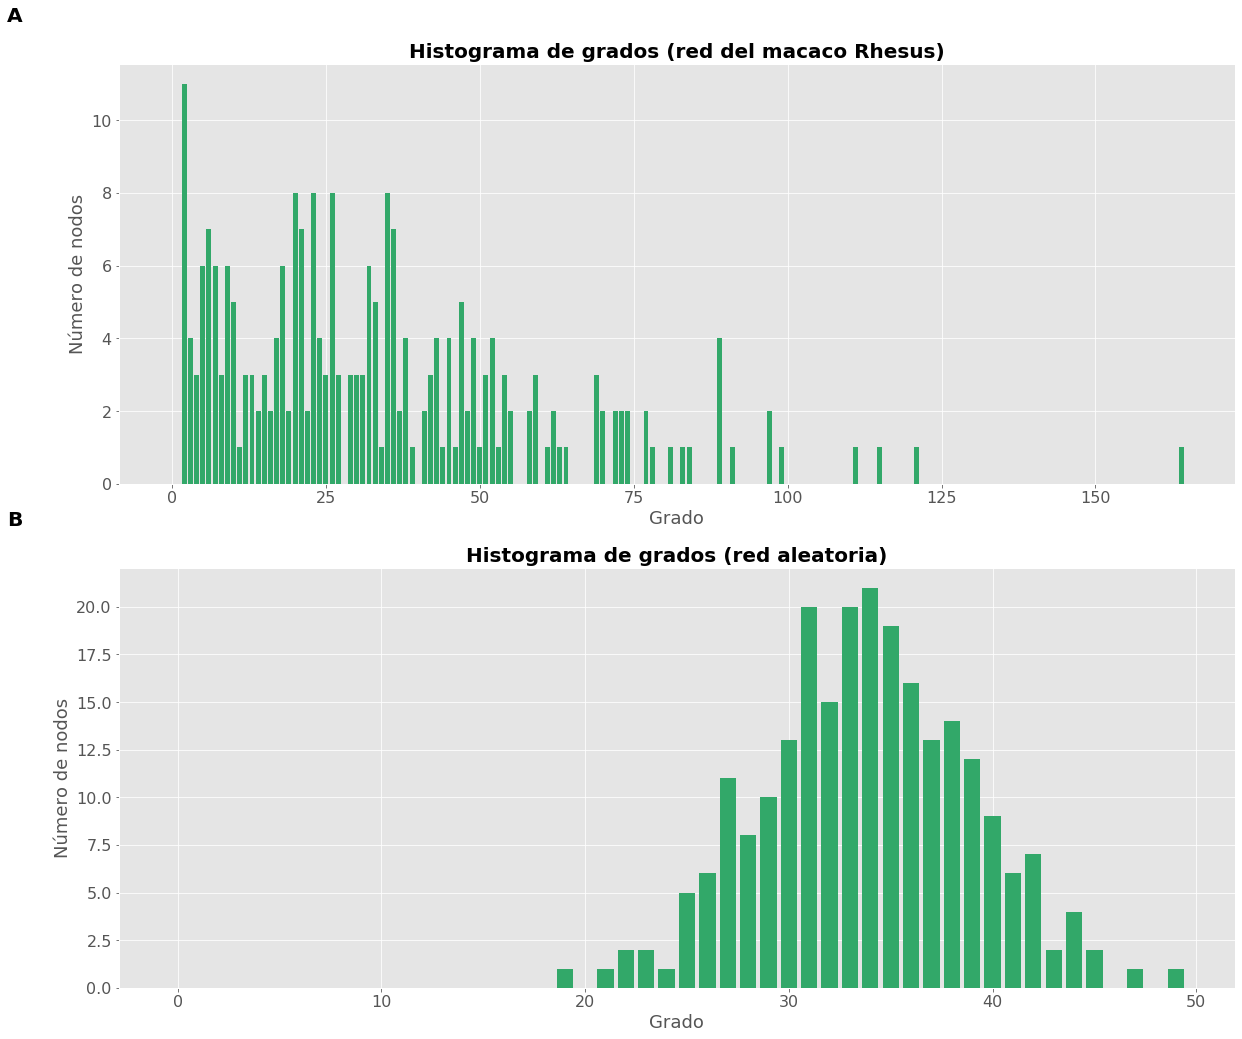

In [14]:
# Cálculo de la distribución de grados de los grafos
L_AL = nx.degree_histogram(G_AL)
L_RB = nx.degree_histogram(G_RB)

# Settings representación
textSize = 20
list_titles = ["Histograma de grados (red del macaco Rhesus)", "Histograma de grados (red aleatoria)"]
list_data = [L_RB, L_AL]

# Representación 
fig, axs = plt.subplots(2, 1, figsize = (20, 17))

for nax, ax in enumerate(axs.flat):
    ax.bar(range(len(list_data[nax])), list_data[nax], width = 0.80, color = "#32a869")
    ax.set_title(list_titles[nax], fontweight = "bold", fontsize =  textSize)
    ax.text(-0.1, 1.1, string.ascii_uppercase[nax], transform = ax.transAxes,
            size = textSize + 0.2, weight = 'bold')
    ax.set_ylabel("Número de nodos", fontsize = textSize * 0.9)
    ax.set_xlabel("Grado", fontsize = textSize * 0.9)
    ax.tick_params(labelsize = textSize * 0.8)

* f. ¿Qué conclusión sacas de lo anterior? Dibuja ahora la distribución del grado de los nodos de la red de interacción de proteínas usando escala logarítmica en ambos ejes, añade para ello estas dos líneas de código para cambiar el tipo de escala en cada eje: ``plt.xscale("log", nonposx='clip')``, ``plt.yscale("log", nonposy='clip')``. ¿Qué tipo de gráfica obtienes? ¿Podrías calcular aproximadamente la pendiente de los datos?

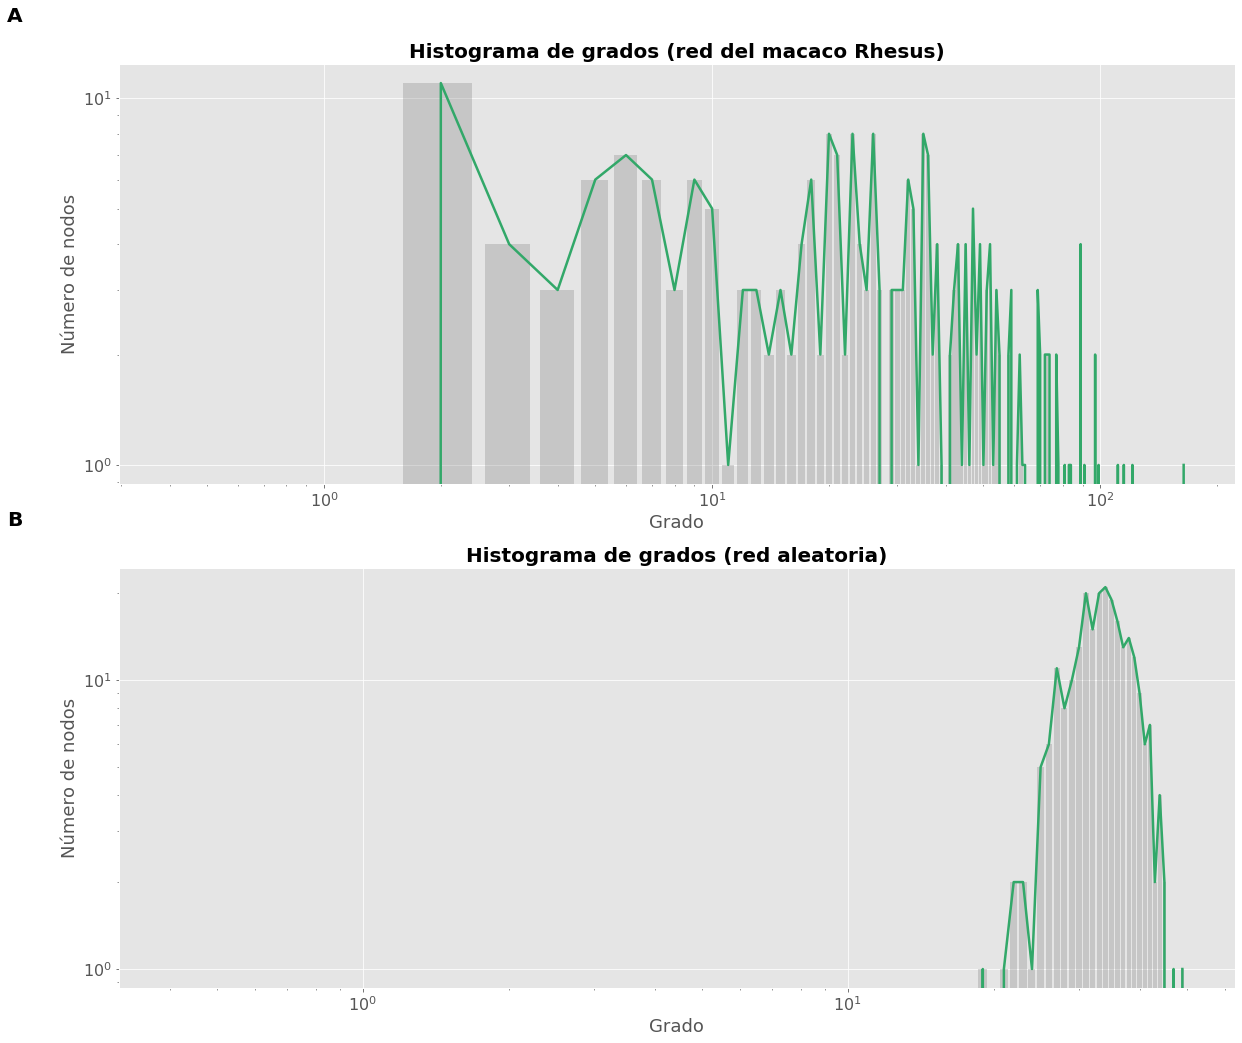

In [15]:
# Representación 
fig, axs = plt.subplots(2, 1, figsize = (20, 17))

for nax, ax in enumerate(axs.flat):
    ax.plot(range(len(list_data[nax])), list_data[nax], color = "#32a869", linewidth = 2.5)
    ax.bar(range(len(list_data[nax])), list_data[nax], alpha = 0.3, color = "grey")
    ax.set_title(list_titles[nax], fontweight = "bold", fontsize =  textSize)
    ax.text(-0.1, 1.1, string.ascii_uppercase[nax], transform = ax.transAxes,
            size = textSize + 0.2, weight = 'bold')
    ax.set_ylabel("Número de nodos", fontsize = textSize * 0.9)
    ax.set_xlabel("Grado", fontsize = textSize * 0.9)
    ax.tick_params(labelsize = textSize * 0.8)
    ax.set_xscale("log", nonposx='clip')
    ax.set_yscale("log", nonposy='clip')

* g. ¿Cuál es el valor promedio de los coeficientes C (índice de clusterización) y L (camino característico) de cada uno de los grafos?

Como G_RB es un grafo dirigido, no se puede calcular su camino característico. Sin embargo, se podría quitar la direccionalidad y, considerando solo los nodos y ramas sin dirección, calcular dicho camino. No creo que sea muy correcto hacerlo, pero para tenerlo hecho por si fuese útil o dar vueltas sobre esta u otras ideas.

In [18]:
max_connected = lambda graph: max([graph.subgraph(c) for c in nx.connected_components(graph)], key = len)
G_RB_nd = nx.Graph(G_RB)
if os.path.isfile("datos/Gs_metrics_RB.pkl"):
    with open("datos/Gs_metrics_RB.pkl", "rb") as file:
        Gs_metrics = pickle.load(file)
else:
    C_RB = nx.average_clustering(G_RB)
    if nx.is_connected(G_RB_nd):
        L_RB = nx.average_shortest_path_length(G_RB_nd)
    else:
        L_RB = nx.average_shortest_path_length(max_connected(G_RB_nd))
    C_AL = nx.average_clustering(G_AL)
    if nx.is_connected(G_AL):
        L_AL = nx.average_shortest_path_length(G_AL)
    else:
        L_AL = nx.average_shortest_path_length(max_connected(G_AL))
    
    Gs_metrics = [C_RB, L_RB, C_AL, L_AL]
    
    with open("datos/Gs_metrics_RB.pkl", "wb") as file:
        pickle.dump(Gs_metrics, file, -1)

In [19]:
print("El índice de clusterización (C) promedio de G_RB es {0}.".format(round(Gs_metrics[0], 4)))
if nx.is_connected(G_RB_nd):
    print("El camino característico (L) promedio de G_RB es {0}.".format(round(Gs_metrics[1], 4)))
else:
    print("Dado que el grafo G_RB no es conexo, su camino característico (L) promedio se puede denotar como el",
          "número de nodos - 1 o se puede calcular el L promedio de la componente conexa de mayor tamaño de dicho",
          "grafo, cuyos respectivos valores son: {0}; {1}.".format(int(n - 1), round(Gs_metrics[1], 4)))
print()
print("El índice de clusterización (C) promedio de G_AL es {0}.".format(round(Gs_metrics[2], 4)))
if nx.is_connected(G_AL):
    print("El camino característico (L) promedio de G_AL es {0}.".format(round(Gs_metrics[3], 4)))
else:
    print("Dado que el grafo G_AL no es conexo, su camino característico (L) promedio se puede denotar como el",
          "número de nodos - 1 o se puede calcular el L promedio de la componente conexa de mayor tamaño de dicho",
          "grafo, cuyos respectivos valores son: {0}; {1}.".format(int(n - 1), round(Gs_metrics[3], 4)))

El índice de clusterización (C) promedio de G_RB es 0.3715.
El camino característico (L) promedio de G_RB es 2.2175.

El índice de clusterización (C) promedio de G_AL es 0.1372.
El camino característico (L) promedio de G_AL es 1.866.


## Comunidades

In [20]:
# algoritmo de Louvain: heurístico, el óptimo es NP-completo
# 40 iteraciones, mejor partición (revisar)

modu = 0
for i in range(40):
    partition = community_louvain.best_partition(G_RB_nd)
    x = community_louvain.modularity(partition, G_RB_nd)

    if x > modu:
        modu = x
        best_partition = partition

In [21]:
num_com = max(best_partition.items(), key = lambda x: x[1])
range_com = range(num_com[1])

length = []
for i in range_com:
    x = list(filter(lambda y: y[1] == i, best_partition.items()))
    length.append(len(x))

# index con longitudes
index_len = tuple(zip(list(range_com), length))

# comunidades ordenadas por tamaño
sort_len = sorted(index_len, key = lambda x: x[1], reverse = True)

# proteínas de la comunidad de mayor tamaño
com_max_size = list(filter(lambda x: x[1] == sort_len[0][0], best_partition.items()))

In [22]:
sort_len

[(3, 59), (2, 56), (1, 46), (0, 32)]

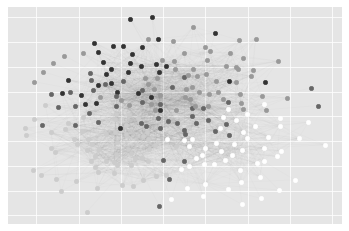

In [23]:
size = float(len(set(partition.values())))
pos = nx.kamada_kawai_layout(G_RB_nd)
count = 0.
for com in set(partition.values()) :
    count += 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G_RB_nd, pos, list_nodes, node_size = 20,
                            node_color = str(count / size))
nx.draw_networkx_edges(G_RB_nd, pos, alpha=0.01)
plt.show()

In [26]:
# Definición de la función L_C_Random
def L_C_Random(graphs_number, n, m):
    C = []
    L = []
    for graph in range(graphs_number):
        G = nx.gnm_random_graph(n, m)
        C.append(nx.average_clustering(G))
        if nx.is_connected(G):
            L.append(nx.average_shortest_path_length(G))
        else:
            G_max = max_connected(G)
            L.append(nx.average_shortest_path_length(G_max))
            
    return L, C

In [30]:
random_comparaciones = L_C_Random(1000, n, m)

In [37]:
cont = 0
for L in random_comparaciones[0]:
    if Gs_metrics[1] <= L:
        cont += 1
print(cont/1000)
cont = 0
for C in random_comparaciones[1]:
    if Gs_metrics[0] <= C:
        cont += 1
print(cont/1000)

0.0
0.0
